In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Fetch the dataset
from sklearn.datasets import fetch_openml

df = fetch_openml(
    name = 'boston', 
    version = 1,
    as_frame = True
)

#Get the target and the data
target = df.target
df = df.data

In [30]:
df.info()

#Lets check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [42]:
#Now lets check the cardinality of the categorical features
cat_df = df.select_dtypes(include = 'category')
print("Number of unique vals in cat cols : \n", cat_df.nunique())
print("Also print the values in each case")
cat_df.value_counts()

Number of unique vals in cat cols : 
 CHAS    2
RAD     9
dtype: int64
Also print the values in each case


CHAS  RAD
0     24     124
      5      104
      4      102
      3       36
      6       26
      2       24
      1       19
      8       19
      7       17
1     5       11
      24       8
      4        8
      8        5
      3        2
      1        1
Name: count, dtype: int64

In [43]:
#Now let's one hot encode the categorical columns
df = pd.get_dummies(
    df, 
    columns=cat_df.columns.to_list(),
    drop_first=True
)

#Recheck the dataset
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,False,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,False,False,False,True,False,False,False,False,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,False,False,False,True,False,False,False,False,False


In [47]:
#Now train a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mean_squared_error(y_pred, y_test)

24.818442738481696

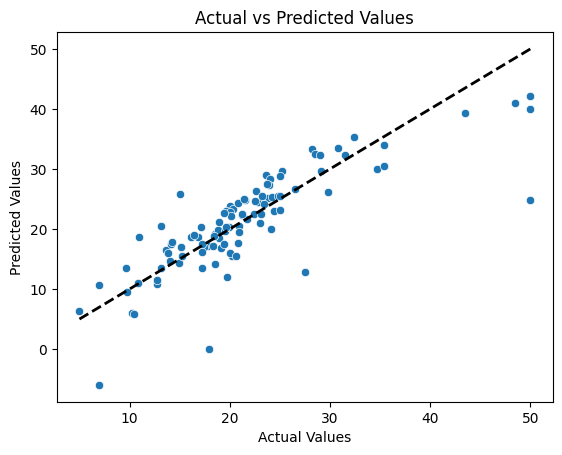

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()